**Тема**: Прогнозирование конечных свойств новых материалов (композиционных материалов). 



**Подключаем библиотеки**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**Загружаем таблицы со свойствами композитов**.

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
X_bp_df = pd.read_excel(open('drive/MyDrive/X_bp.xlsx','rb'))
X_bp_df.head(5)

Unnamed: 0  Соотношение матрица-наполнитель  Плотность, кг/м3  \
0         0.0                         1.857143            2030.0   
1         1.0                         1.857143            2030.0   
2         2.0                         1.857143            2030.0   
3         3.0                         1.857143            2030.0   
4         4.0                         2.771331            2030.0   

   модуль упругости, ГПа  Количество отвердителя, м.%  \
0             738.736842                        30.00   
1             738.736842                        50.00   
2             738.736842                        49.90   
3             738.736842                       129.00   
4             753.000000                       111.86   

   Содержание эпоксидных групп,%_2  Температура вспышки, С_2  \
0                        22.267857                100.000000   
1                        23.750000                284.615385   
2                        33.000000                284.615385   
3                        21.250000                300.000000   
4                        22.267857                284.615385   

   Поверхностная плотность, г/м2  Модуль упругости при растяжении, ГПа  \
0                          210.0                                  70.0   
1                          210.0                                  70.0   
2                          210.0                                  70.0   
3                          210.0                                  70.0   
4                          210.0                                  70.0   

   Прочность при растяжении, МПа  Потребление смолы, г/м2  
0                         3000.0                    220.0  
1                         3000.0                    220.0  
2                         3000.0                    220.0  
3                         3000.0                    220.0  
4                         3000.0                    220.0

In [ ]:
X_nup_df = pd.read_excel(open('drive/MyDrive/X_nup.xlsx','rb'))
X_nup_df.head(5)

Unnamed: 0  Угол нашивки, град  Шаг нашивки  Плотность нашивки
0         0.0                 0.0          4.0               57.0
1         1.0                 0.0          4.0               60.0
2         2.0                 0.0          4.0               70.0
3         3.0                 0.0          5.0               47.0
4         4.0                 0.0          5.0               57.0

**Обьединим выборки**

In [ ]:
df = X_bp_df.merge(X_nup_df, left_index=True, right_index=True, how='inner')
df.head(5)

Unnamed: 0_x  Соотношение матрица-наполнитель  Плотность, кг/м3  \
0           0.0                         1.857143            2030.0   
1           1.0                         1.857143            2030.0   
2           2.0                         1.857143            2030.0   
3           3.0                         1.857143            2030.0   
4           4.0                         2.771331            2030.0   

   модуль упругости, ГПа  Количество отвердителя, м.%  \
0             738.736842                        30.00   
1             738.736842                        50.00   
2             738.736842                        49.90   
3             738.736842                       129.00   
4             753.000000                       111.86   

   Содержание эпоксидных групп,%_2  Температура вспышки, С_2  \
0                        22.267857                100.000000   
1                        23.750000                284.615385   
2                        33.000000                284.615385   
3                        21.250000                300.000000   
4                        22.267857                284.615385   

   Поверхностная плотность, г/м2  Модуль упругости при растяжении, ГПа  \
0                          210.0                                  70.0   
1                          210.0                                  70.0   
2                          210.0                                  70.0   
3                          210.0                                  70.0   
4                          210.0                                  70.0   

   Прочность при растяжении, МПа  Потребление смолы, г/м2  Unnamed: 0_y  \
0                         3000.0                    220.0           0.0   
1                         3000.0                    220.0           1.0   
2                         3000.0                    220.0           2.0   
3                         3000.0                    220.0           3.0   
4                         3000.0                    220.0           4.0   

   Угол нашивки, град  Шаг нашивки  Плотность нашивки  
0                 0.0          4.0               57.0  
1                 0.0          4.0               60.0  
2                 0.0          4.0               70.0  
3                 0.0          5.0               47.0  
4                 0.0          5.0               57.0

**Удалим безымянные колонки**

In [ ]:
df.drop(columns= ['Unnamed: 0_x', 'Unnamed: 0_y'],axis=1, inplace=True)
df.head()

Соотношение матрица-наполнитель  Плотность, кг/м3  модуль упругости, ГПа  \
0                         1.857143            2030.0             738.736842   
1                         1.857143            2030.0             738.736842   
2                         1.857143            2030.0             738.736842   
3                         1.857143            2030.0             738.736842   
4                         2.771331            2030.0             753.000000   

   Количество отвердителя, м.%  Содержание эпоксидных групп,%_2  \
0                        30.00                        22.267857   
1                        50.00                        23.750000   
2                        49.90                        33.000000   
3                       129.00                        21.250000   
4                       111.86                        22.267857   

   Температура вспышки, С_2  Поверхностная плотность, г/м2  \
0                100.000000                          210.0   
1                284.615385                          210.0   
2                284.615385                          210.0   
3                300.000000                          210.0   
4                284.615385                          210.0   

   Модуль упругости при растяжении, ГПа  Прочность при растяжении, МПа  \
0                                  70.0                         3000.0   
1                                  70.0                         3000.0   
2                                  70.0                         3000.0   
3                                  70.0                         3000.0   
4                                  70.0                         3000.0   

   Потребление смолы, г/м2  Угол нашивки, град  Шаг нашивки  Плотность нашивки  
0                    220.0                 0.0          4.0               57.0  
1                    220.0                 0.0          4.0               60.0  
2                    220.0                 0.0          4.0               70.0  
3                    220.0                 0.0          5.0               47.0  
4                    220.0                 0.0          5.0               57.0

**Предобработка и Разведочный анализ данных**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1023 entries, 0 to 1022
Data columns (total 13 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Соотношение матрица-наполнитель       1023 non-null   float64
 1   Плотность, кг/м3                      1023 non-null   float64
 2   модуль упругости, ГПа                 1023 non-null   float64
 3   Количество отвердителя, м.%           1023 non-null   float64
 4   Содержание эпоксидных групп,%_2       1023 non-null   float64
 5   Температура вспышки, С_2              1023 non-null   float64
 6   Поверхностная плотность, г/м2         1023 non-null   float64
 7   Модуль упругости при растяжении, ГПа  1023 non-null   float64
 8   Прочность при растяжении, МПа         1023 non-null   float64
 9   Потребление смолы, г/м2               1023 non-null   float64
 10  Угол нашивки, град                    1023 non-null   float64
 11  Шаг нашивки      

**describe** Чтобы получить первичное представление о статистических характеристиках нашего датасета, достаточно этой команды.Обзор содержит среднее значение, стандартное отклонение, минимум и максимум, верхние значения первого и третьего квартиля и медиану по каждому столбцу.

In [ ]:
df.describe()

Соотношение матрица-наполнитель  Плотность, кг/м3  \
count                      1023.000000       1023.000000   
mean                          2.930366       1975.734888   
std                           0.913222         73.729231   
min                           0.389403       1731.764635   
25%                           2.317887       1924.155467   
50%                           2.906878       1977.621657   
75%                           3.552660       2021.374375   
max                           5.591742       2207.773481   

       модуль упругости, ГПа  Количество отвердителя, м.%  \
count            1023.000000                  1023.000000   
mean              739.923233                   110.570769   
std               330.231581                    28.295911   
min                 2.436909                    17.740275   
25%               500.047452                    92.443497   
50%               739.664328                   110.564840   
75%               961.812526                   129.730366   
max              1911.536477                   198.953207   

       Содержание эпоксидных групп,%_2  Температура вспышки, С_2  \
count                      1023.000000               1023.000000   
mean                         22.244390                285.882151   
std                           2.406301                 40.943260   
min                          14.254985                100.000000   
25%                          20.608034                259.066528   
50%                          22.230744                285.896812   
75%                          23.961934                313.002106   
max                          33.000000                413.273418   

       Поверхностная плотность, г/м2  Модуль упругости при растяжении, ГПа  \
count                    1023.000000                           1023.000000   
mean                      482.731833                             73.328571   
std                       281.314690                              3.118983   
min                         0.603740                             64.054061   
25%                       266.816645                             71.245018   
50%                       451.864365                             73.268805   
75%                       693.225017                             75.356612   
max                      1399.542362                             82.682051   

       Прочность при растяжении, МПа  Потребление смолы, г/м2  \
count                    1023.000000              1023.000000   
mean                     2466.922843               218.423144   
std                       485.628006                59.735931   
min                      1036.856605                33.803026   
25%                      2135.850448               179.627520   
50%                      2459.524526               219.198882   
75%                      2767.193119               257.481724   
max                      3848.436732               414.590628   

       Угол нашивки, град  Шаг нашивки  Плотность нашивки  
count         1023.000000  1023.000000        1023.000000  
mean            44.252199     6.899222          57.153929  
std             45.015793     2.563467          12.350969  
min              0.000000     0.000000           0.000000  
25%              0.000000     5.080033          49.799212  
50%              0.000000     6.916144          57.341920  
75%             90.000000     8.586293          64.944961  
max             90.000000    14.440522         103.988901

проверяем на наличие дубликатов

In [ ]:
df.duplicated().sum()

0

построим гистограммы

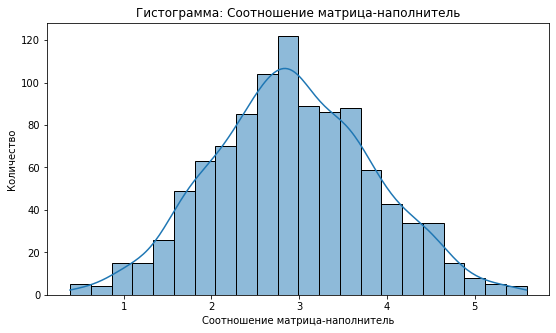

Максимальное значение: 5.59174159869754
Минимальное значение: 0.389402605178414


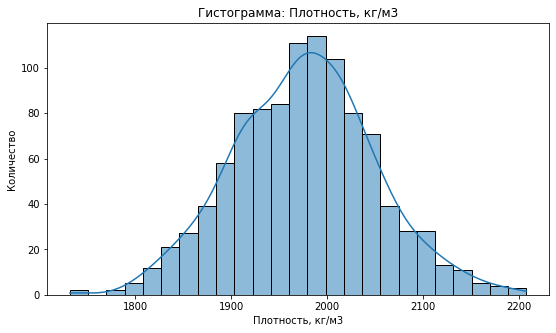

Максимальное значение: 2207.77348061119
Минимальное значение: 1731.764635096


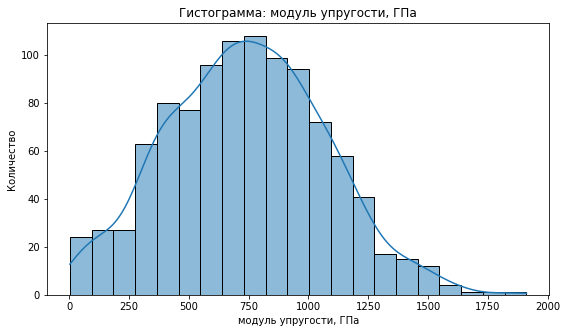

Максимальное значение: 1911.53647700054
Минимальное значение: 2.4369087535075


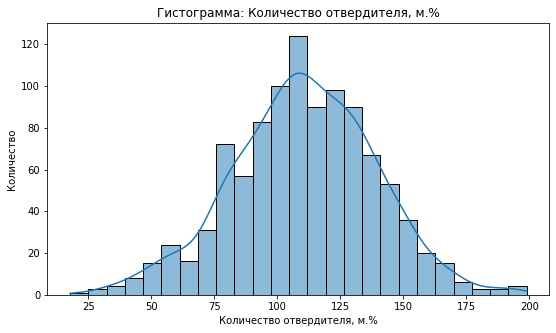

Максимальное значение: 198.953207190451
Минимальное значение: 17.7402745562519


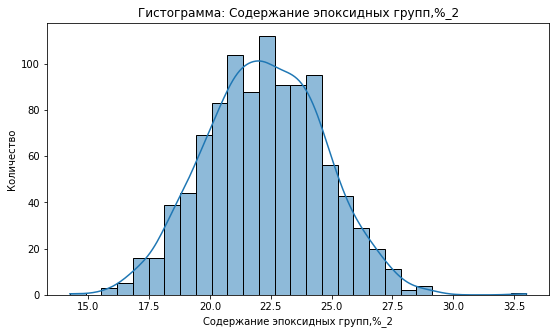

Максимальное значение: 33.0
Минимальное значение: 14.2549854977161


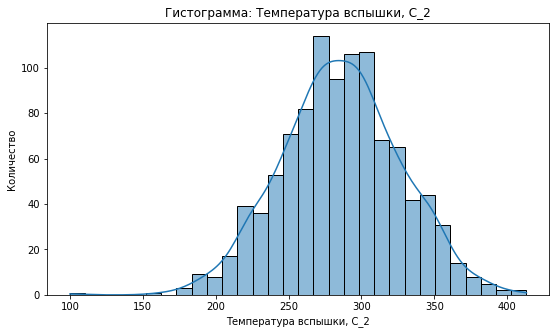

Максимальное значение: 413.273418243566
Минимальное значение: 100.0


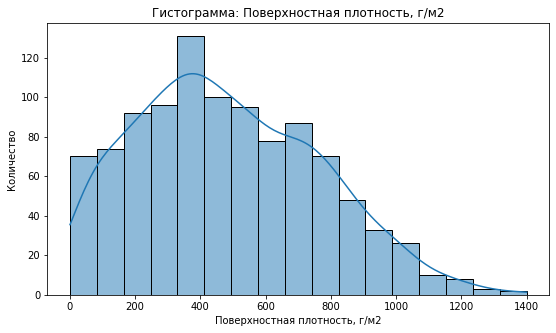

Максимальное значение: 1399.54236233989
Минимальное значение: 0.603739925153945


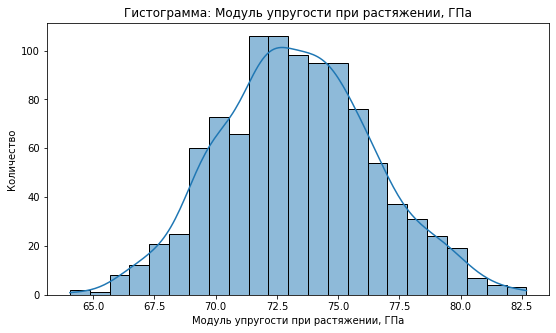

Максимальное значение: 82.682051035271
Минимальное значение: 64.0540605597917


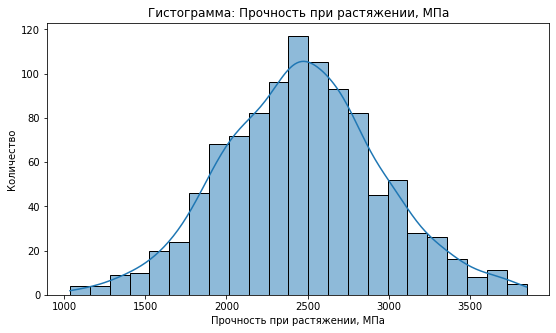

Максимальное значение: 3848.43673187618
Минимальное значение: 1036.85660535


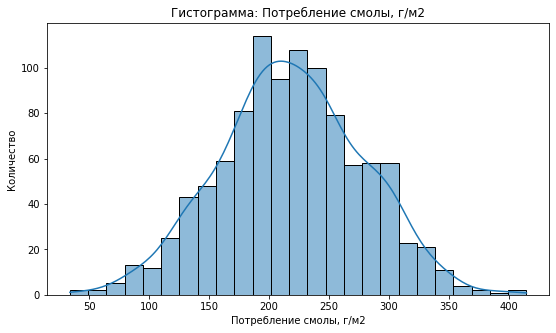

Максимальное значение: 414.590628361534
Минимальное значение: 33.8030255329625


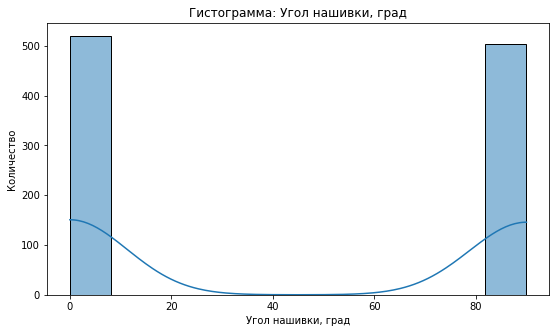

Максимальное значение: 90.0
Минимальное значение: 0.0


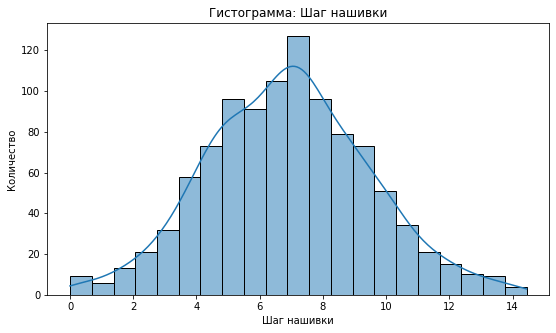

Максимальное значение: 14.4405218753969
Минимальное значение: 0.0


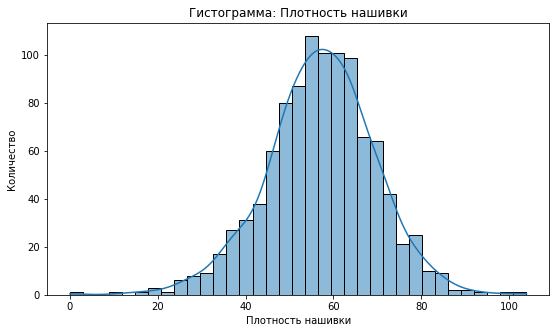

Максимальное значение: 103.988901301494
Минимальное значение: 0.0


In [ ]:
for col in df.columns:
  plt.figure(figsize=(9,5))
  plt.title('Гистограмма:'+ ' '+col)
  plt.ylabel('Количество')
  sns.histplot(data = df[col],kde=True)
  plt.savefig('D:\Data Science\Гистограмма.pdf')
  plt.show()
  print(f'Максимальное значение: {df[col].max()}')
  print(f'Минимальное значение: {df[col].min()}')

Построим ящик с усами чтобы узнать о наличии выбросов

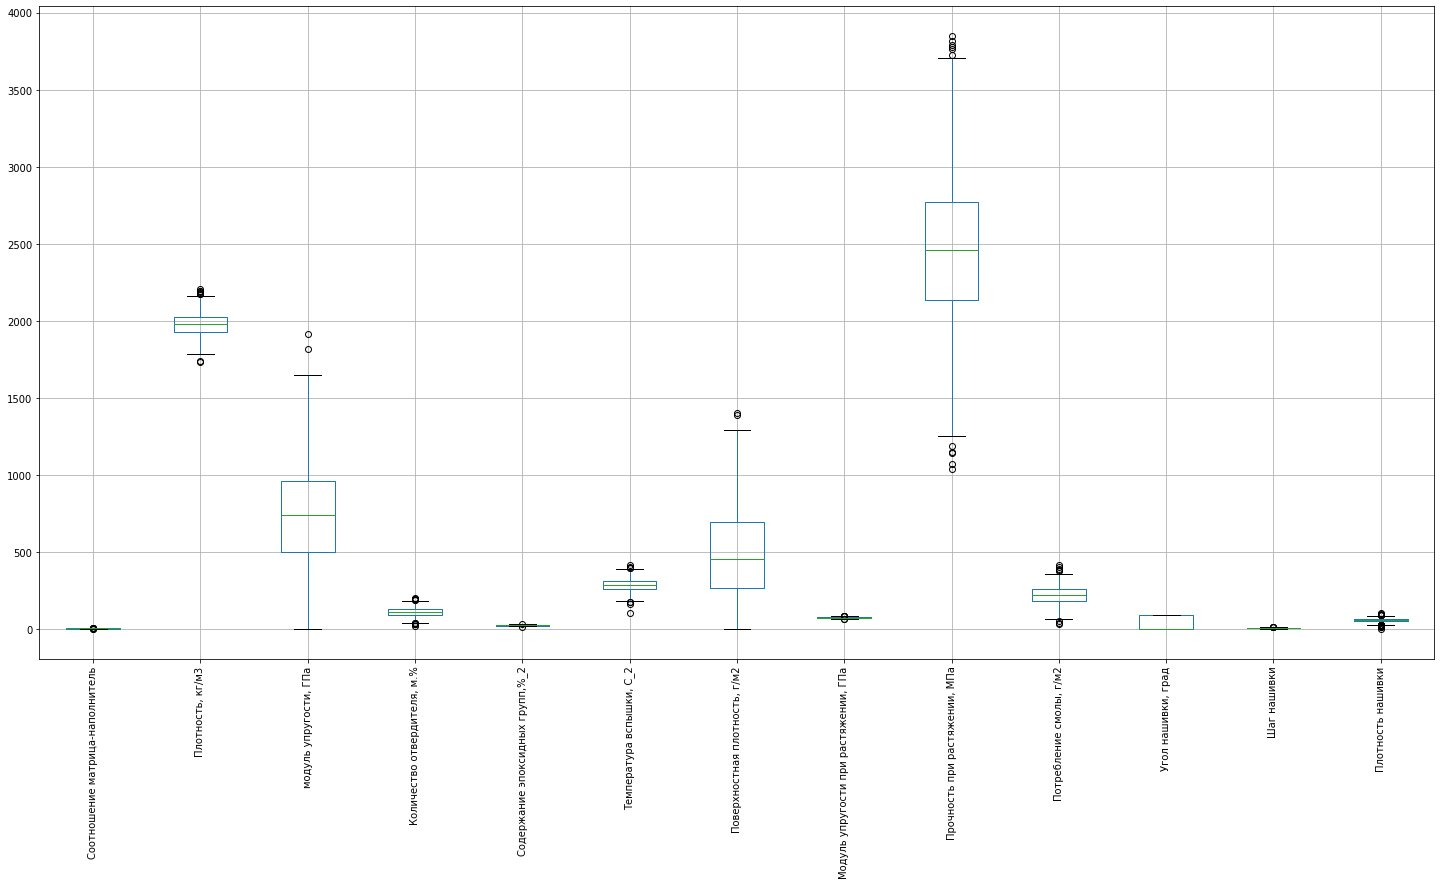

In [ ]:
boxplot = df.boxplot(rot=90, figsize=(25,12))

Построим графики рассеивания

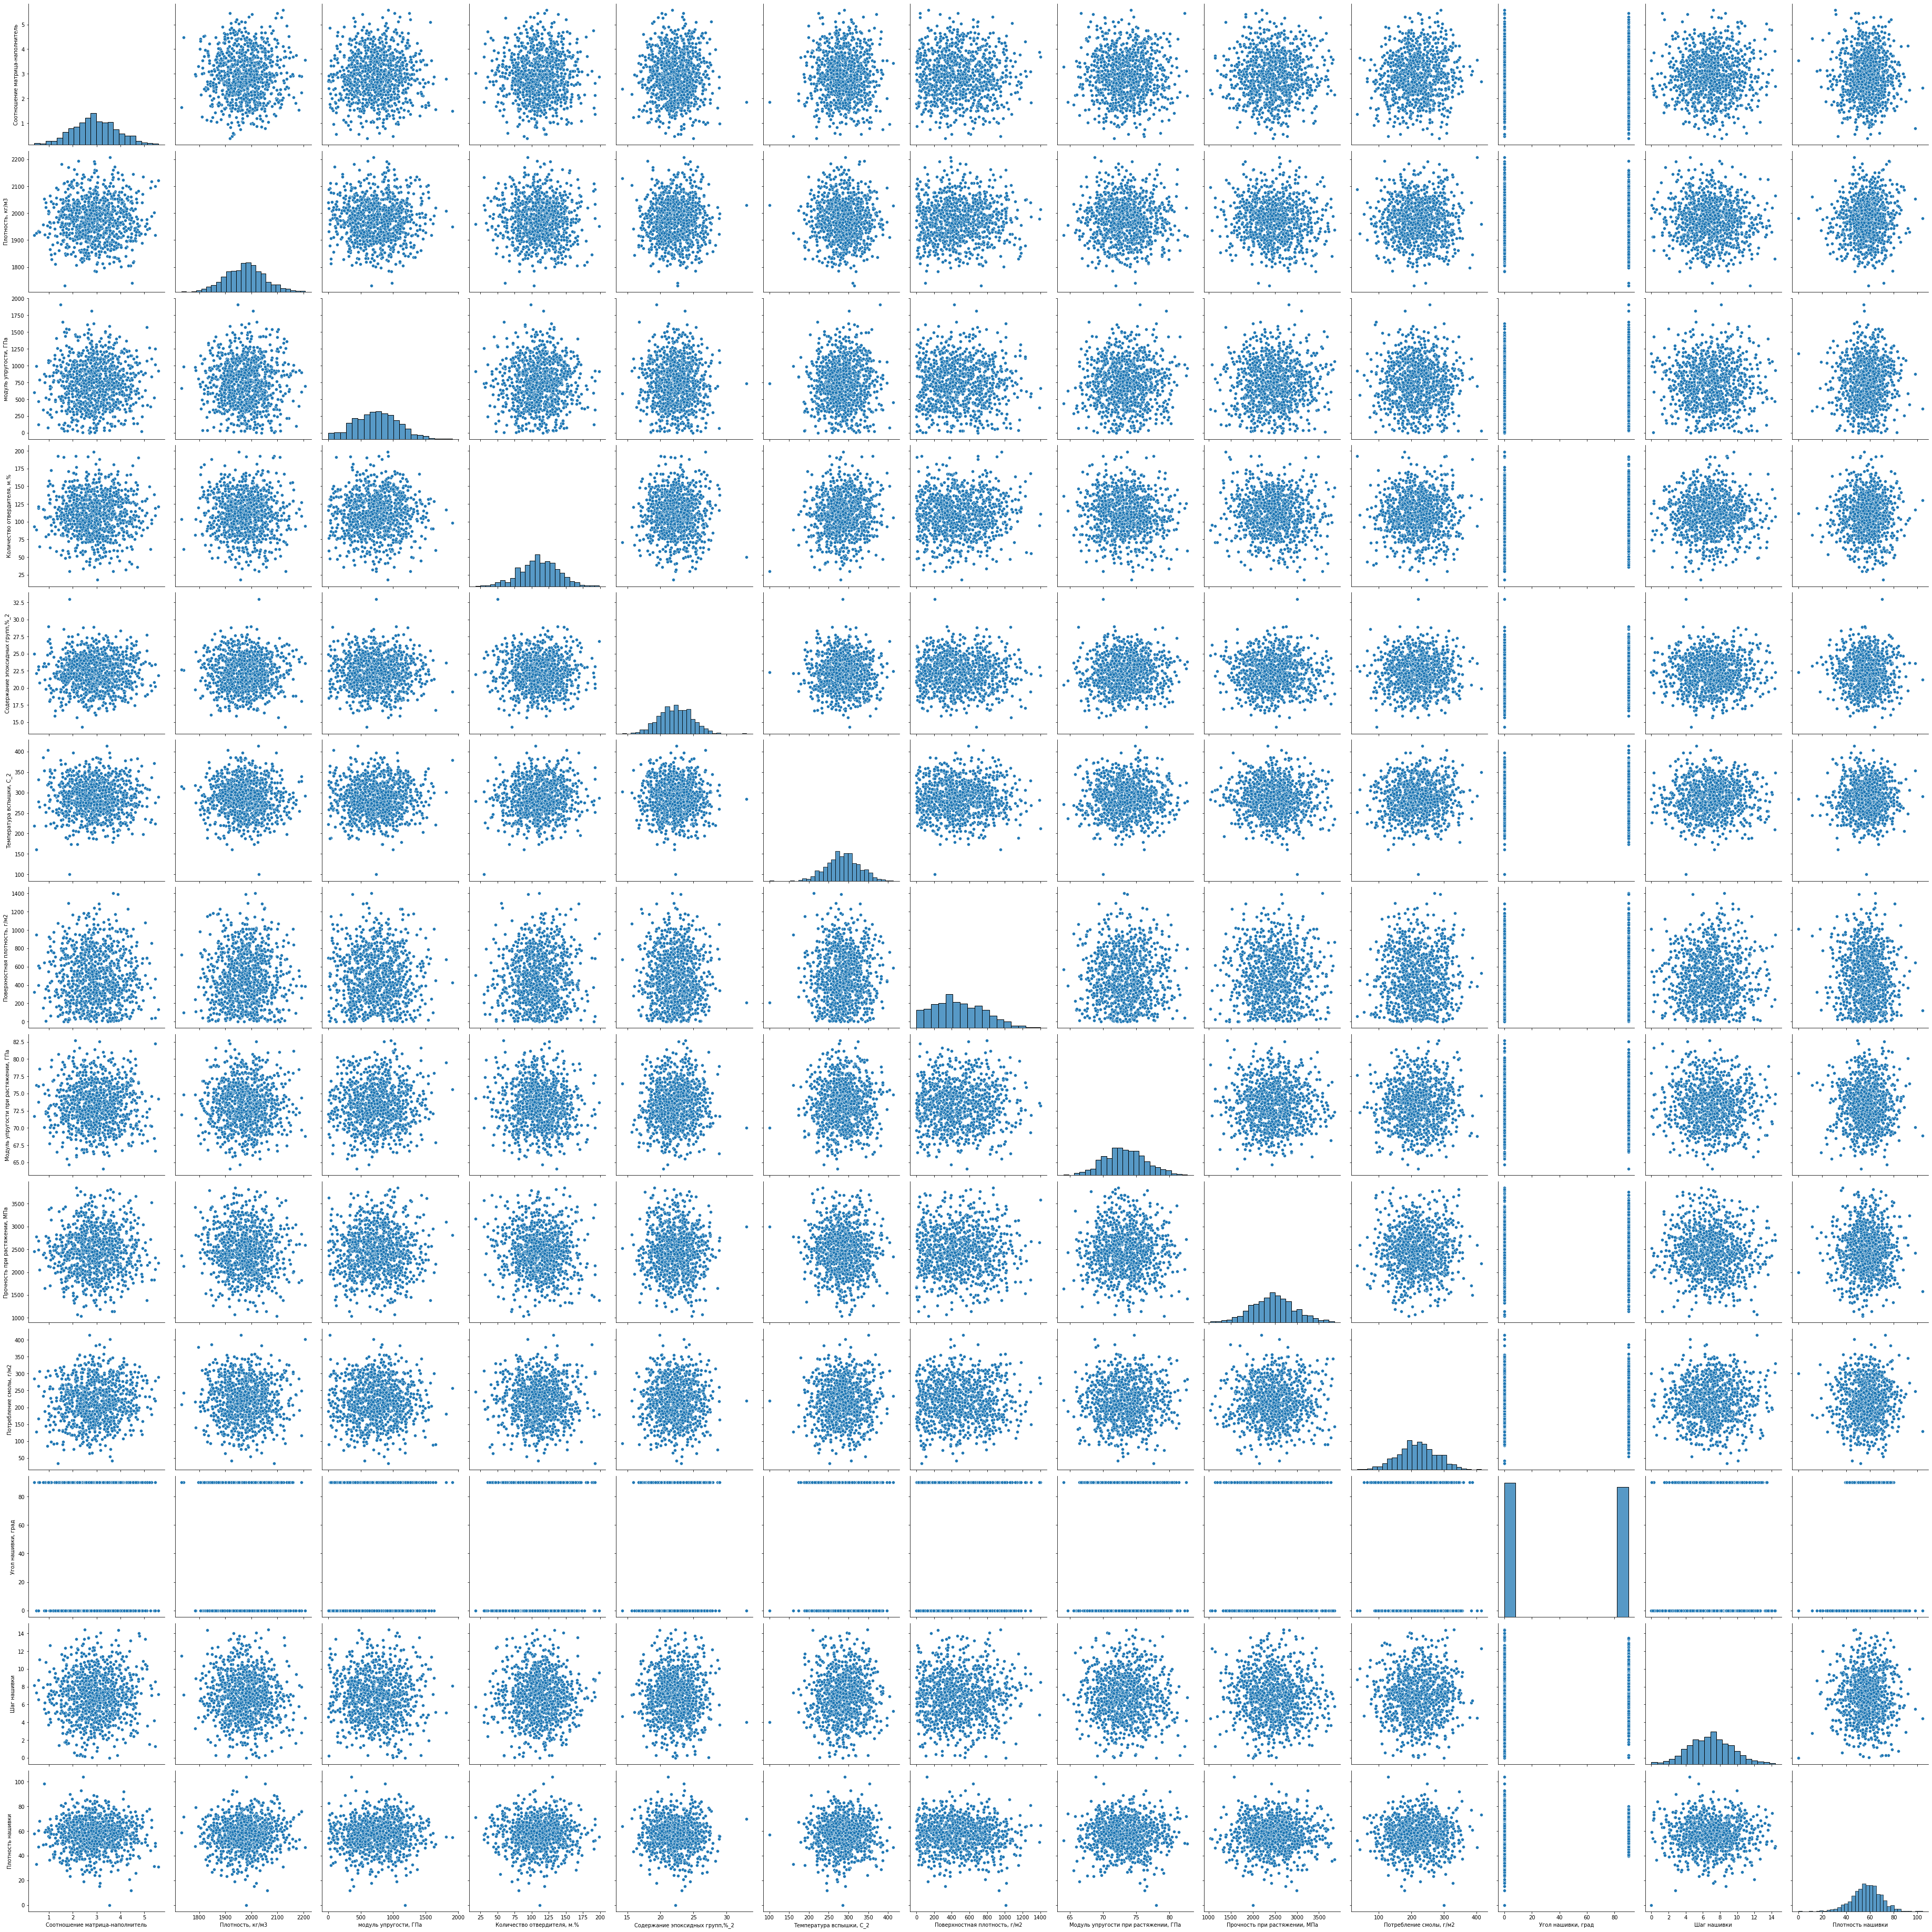

In [ ]:
sns.pairplot(df, height=4)

коэффициент корреляции

In [14]:
df.corr()

Соотношение матрица-наполнитель  \
Соотношение матрица-наполнитель                              1.000000   
Плотность, кг/м3                                             0.003841   
модуль упругости, ГПа                                        0.031700   
Количество отвердителя, м.%                                 -0.006445   
Содержание эпоксидных групп,%_2                              0.019766   
Температура вспышки, С_2                                    -0.004776   
Поверхностная плотность, г/м2                               -0.006272   
Модуль упругости при растяжении, ГПа                        -0.008411   
Прочность при растяжении, МПа                                0.024148   
Потребление смолы, г/м2                                      0.072531   
Угол нашивки, град                                          -0.031073   
Шаг нашивки                                                  0.036437   
Плотность нашивки                                           -0.004652   

                                      Плотность, кг/м3  модуль упругости, ГПа  \
Соотношение матрица-наполнитель               0.003841               0.031700   
Плотность, кг/м3                              1.000000              -0.009647   
модуль упругости, ГПа                        -0.009647               1.000000   
Количество отвердителя, м.%                  -0.035911               0.024049   
Содержание эпоксидных групп,%_2              -0.008278              -0.006804   
Температура вспышки, С_2                     -0.020695               0.031174   
Поверхностная плотность, г/м2                 0.044930              -0.005306   
Модуль упругости при растяжении, ГПа         -0.017602               0.023267   
Прочность при растяжении, МПа                -0.069981               0.041868   
Потребление смолы, г/м2                      -0.015937               0.001840   
Угол нашивки, град                           -0.068474              -0.025417   
Шаг нашивки                                  -0.061015              -0.009875   
Плотность нашивки                             0.080304               0.056346   

                                      Количество отвердителя, м.%  \
Соотношение матрица-наполнитель                         -0.006445   
Плотность, кг/м3                                        -0.035911   
модуль упругости, ГПа                                    0.024049   
Количество отвердителя, м.%                              1.000000   
Содержание эпоксидных групп,%_2                         -0.000684   
Температура вспышки, С_2                                 0.095193   
Поверхностная плотность, г/м2                            0.055198   
Модуль упругости при растяжении, ГПа                    -0.065929   
Прочность при растяжении, МПа                           -0.075375   
Потребление смолы, г/м2                                  0.007446   
Угол нашивки, град                                       0.038570   
Шаг нашивки                                              0.014887   
Плотность нашивки                                        0.017248   

                                      Содержание эпоксидных групп,%_2  \
Соотношение матрица-наполнитель                              0.019766   
Плотность, кг/м3                                            -0.008278   
модуль упругости, ГПа                                       -0.006804   
Количество отвердителя, м.%                                 -0.000684   
Содержание эпоксидных групп,%_2                              1.000000   
Температура вспышки, С_2                                    -0.009769   
Поверхностная плотность, г/м2                               -0.012940   
Модуль упругости при растяжении, ГПа                         0.056828   
Прочность при растяжении, МПа                               -0.023899   
Потребление смолы, г/м2                                      0.015165   
Угол нашивки, град                                           0.008052   
Шаг нашивки                          

построим тепловую карту признаков

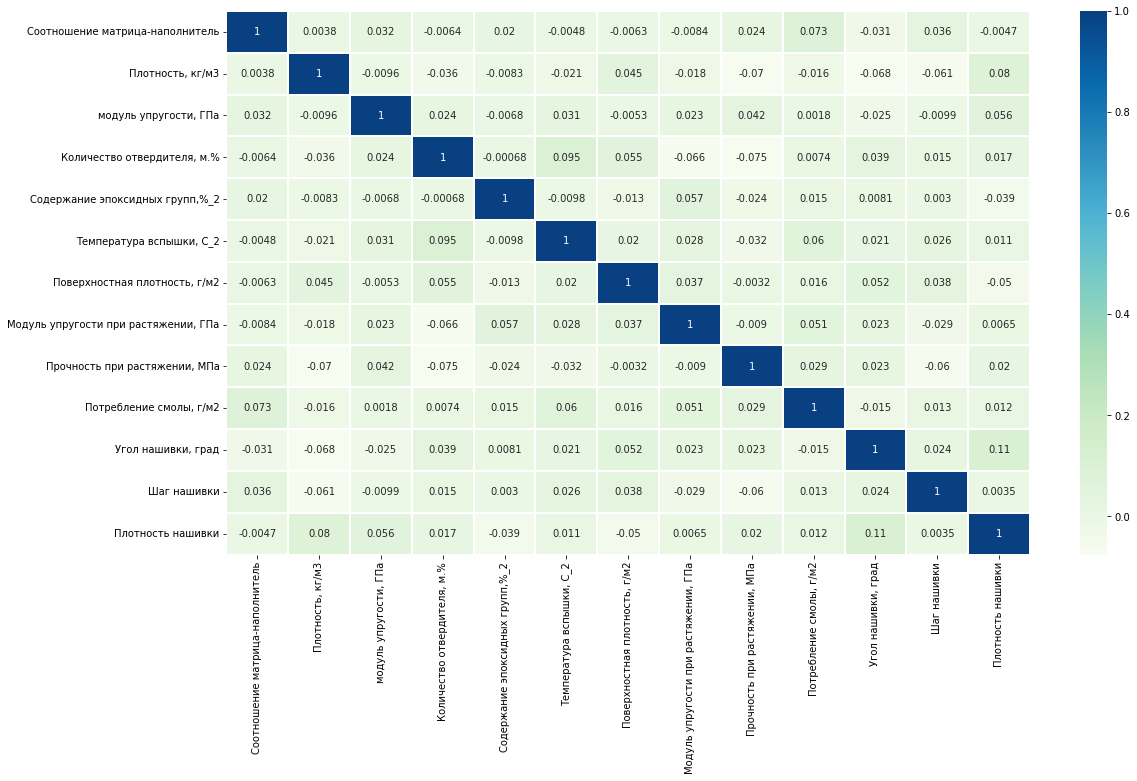

In [13]:
plt.figure(figsize = (18,10))
sns.heatmap(df.corr(),cmap= 'GnBu', annot = True, linewidths=1, linecolor = 'white')

выведем среднее значение параметров

In [15]:
df.mean()

Соотношение матрица-наполнитель            2.930366
Плотность, кг/м3                        1975.734888
модуль упругости, ГПа                    739.923233
Количество отвердителя, м.%              110.570769
Содержание эпоксидных групп,%_2           22.244390
Температура вспышки, С_2                 285.882151
Поверхностная плотность, г/м2            482.731833
Модуль упругости при растяжении, ГПа      73.328571
Прочность при растяжении, МПа           2466.922843
Потребление смолы, г/м2                  218.423144
Угол нашивки, град                        44.252199
Шаг нашивки                                6.899222
Плотность нашивки                         57.153929
dtype: float64

выведем медианное значение

In [16]:
df.median()

Соотношение матрица-наполнитель            2.906878
Плотность, кг/м3                        1977.621657
модуль упругости, ГПа                    739.664328
Количество отвердителя, м.%              110.564840
Содержание эпоксидных групп,%_2           22.230744
Температура вспышки, С_2                 285.896812
Поверхностная плотность, г/м2            451.864365
Модуль упругости при растяжении, ГПа      73.268805
Прочность при растяжении, МПа           2459.524526
Потребление смолы, г/м2                  219.198882
Угол нашивки, град                         0.000000
Шаг нашивки                                6.916144
Плотность нашивки                         57.341920
dtype: float64

проведем очистку от выбросов

In [19]:
for col in df.columns:
    q75,q25 = np.percentile(df.loc[:,col],[75,25])
    intr_qr = q75-q25

    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)

    df.loc[df[col] < min,col] = np.nan
    df.loc[df[col] > max,col] = np.nan

In [20]:
df.isnull().sum()

Соотношение матрица-наполнитель          6
Плотность, кг/м3                         9
модуль упругости, ГПа                    2
Количество отвердителя, м.%             14
Содержание эпоксидных групп,%_2          2
Температура вспышки, С_2                 8
Поверхностная плотность, г/м2            2
Модуль упругости при растяжении, ГПа     6
Прочность при растяжении, МПа           11
Потребление смолы, г/м2                  8
Угол нашивки, град                       0
Шаг нашивки                              4
Плотность нашивки                       21
dtype: int64

In [21]:
df = df.dropna(axis = 0)

In [22]:
df.isnull().sum()

Соотношение матрица-наполнитель         0
Плотность, кг/м3                        0
модуль упругости, ГПа                   0
Количество отвердителя, м.%             0
Содержание эпоксидных групп,%_2         0
Температура вспышки, С_2                0
Поверхностная плотность, г/м2           0
Модуль упругости при растяжении, ГПа    0
Прочность при растяжении, МПа           0
Потребление смолы, г/м2                 0
Угол нашивки, град                      0
Шаг нашивки                             0
Плотность нашивки                       0
dtype: int64

Нормальзуем значения с помощью метода MinMaxScaler

In [23]:
from sklearn.preprocessing import MinMaxScaler

In [24]:
min_max_scaler = MinMaxScaler()
df_norm = pd.DataFrame(min_max_scaler.fit_transform(df), columns = df.columns, index=df.index)

In [25]:
df_norm.describe()

Соотношение матрица-наполнитель  Плотность, кг/м3  \
count                       936.000000        936.000000   
mean                          0.498933          0.502695   
std                           0.187489          0.187779   
min                           0.000000          0.000000   
25%                           0.372274          0.368517   
50%                           0.494538          0.511229   
75%                           0.629204          0.624999   
max                           1.000000          1.000000   

       модуль упругости, ГПа  Количество отвердителя, м.%  \
count             936.000000                   936.000000   
mean                0.446764                     0.504664   
std                 0.199583                     0.188865   
min                 0.000000                     0.000000   
25%                 0.301243                     0.376190   
50%                 0.447061                     0.506040   
75%                 0.580446                     0.637978   
max                 1.000000                     1.000000   

       Содержание эпоксидных групп,%_2  Температура вспышки, С_2  \
count                       936.000000                936.000000   
mean                          0.491216                  0.516059   
std                           0.180620                  0.190624   
min                           0.000000                  0.000000   
25%                           0.367716                  0.386128   
50%                           0.489382                  0.515980   
75%                           0.623410                  0.646450   
max                           1.000000                  1.000000   

       Поверхностная плотность, г/м2  Модуль упругости при растяжении, ГПа  \
count                     936.000000                            936.000000   
mean                        0.373733                              0.488647   
std                         0.217078                              0.191466   
min                         0.000000                              0.000000   
25%                         0.205619                              0.359024   
50%                         0.354161                              0.485754   
75%                         0.538683                              0.615077   
max                         1.000000                              1.000000   

       Прочность при растяжении, МПа  Потребление смолы, г/м2  \
count                     936.000000               936.000000   
mean                        0.495706                 0.521141   
std                         0.188915                 0.195781   
min                         0.000000                 0.000000   
25%                         0.365149                 0.392067   
50%                         0.491825                 0.523766   
75%                         0.612874                 0.652447   
max                         1.000000                 1.000000   

       Угол нашивки, град  Шаг нашивки  Плотность нашивки  
count          936.000000   936.000000         936.000000  
mean             0.511752     0.502232           0.513776  
std              0.500129     0.183258           0.191342  
min              0.000000     0.000000           0.000000  
25%              0.000000     0.372211           0.390482  
50%              1.000000     0.504258           0.516029  
75%              1.000000     0.624604           0.638842  
max              1.000000     1.000000           1.000000

Модель для прогноза модуля упругости при растяжении

In [60]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [61]:
df_norm.columns

Index(['Соотношение матрица-наполнитель', 'Плотность, кг/м3',
       'модуль упругости, ГПа', 'Количество отвердителя, м.%',
       'Содержание эпоксидных групп,%_2', 'Температура вспышки, С_2',
       'Поверхностная плотность, г/м2', 'Модуль упругости при растяжении, ГПа',
       'Прочность при растяжении, МПа', 'Потребление смолы, г/м2',
       'Угол нашивки, град', 'Шаг нашивки', 'Плотность нашивки'],
      dtype='object')

Выделим из датасете зависимую переменную. И разделим выборку на обучающую и тестовую выборки.

In [62]:
x_upr = df.drop(['Модуль упругости при растяжении, ГПа'], axis=1)
x_pr = df.drop(['Прочность при растяжении, МПа'], axis=1)
y_upr = df[['Модуль упругости при растяжении, ГПа']]
y_pr = df[['Прочность при растяжении, МПа']]

X_train_upr, X_test_upr, y_train_upr, y_test_upr = train_test_split(x_upr, y_upr, test_size=0.3, random_state=1)
X_train_pr, X_test_pr, y_train_pr, y_test_pr = train_test_split(x_pr, y_pr, test_size=0.3, random_state=1)

Метод К ближайших соседей

In [63]:
knr = KNeighborsRegressor()
knr_params = {'n_neighbors' : range(1, 301, 2), 
          'weights' : ['uniform', 'distance'],
          'algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute']
          }
GSCV_knr_upr = GridSearchCV(knr, knr_params, n_jobs=-1, cv=10)
GSCV_knr_upr.fit(X_train_upr, y_train_upr)
GSCV_knr_upr.best_params_

{'algorithm': 'auto', 'n_neighbors': 183, 'weights': 'uniform'}

In [64]:
knr_upr = GSCV_knr_upr.best_estimator_
print(f'R2-score для модуля упругости при растяжении: {knr_upr.score(X_test_upr, y_test_upr).round(3)}')

R2-score для модуля упругости при растяжении: -0.001


In [65]:
GSCV_knr_pr = GridSearchCV(knr, knr_params, n_jobs=-1, cv=10)
GSCV_knr_pr.fit(X_train_pr, y_train_pr)
GSCV_knr_pr.best_params_

{'algorithm': 'brute', 'n_neighbors': 61, 'weights': 'distance'}

In [66]:
knr_pr = GSCV_knr_pr.best_estimator_
print(f'R2-score для прочности при растяжении: {knr_pr.score(X_test_pr, y_test_pr).round(3)}')

R2-score для прочности при растяжении: -0.009


коэффициент детерминации=0, это значит, что модель прогнозирует данные с таким же результатом, как если бы мы всегда брали среднее значение прогнозируемой переменной

Линейная регрессия

In [67]:
lr = LinearRegression()
lr_params = {
    'fit_intercept' : ['True', 'False']
}
GSCV_lr_upr = GridSearchCV(lr, lr_params, n_jobs=-1, cv=10)
GSCV_lr_upr.fit(X_train_upr, y_train_upr)
GSCV_lr_upr.best_params_

{'fit_intercept': 'True'}

In [68]:
lr_upr = GSCV_lr_upr.best_estimator_
print(f'R2-score для модуля упругости при растяжении: {lr_upr.score(X_test_upr, y_test_upr).round(3)}')

R2-score для модуля упругости при растяжении: -0.021


In [69]:
GSCV_lr_pr = GridSearchCV(lr, lr_params, n_jobs=-1, cv=10)
GSCV_lr_pr.fit(X_train_pr, y_train_pr)
GSCV_lr_pr.best_params_

{'fit_intercept': 'True'}

In [70]:
lr_pr = GSCV_lr_pr.best_estimator_
print(f'R2-score для прочности при растяжении: {lr_pr.score(X_test_pr, y_test_pr).round(3)}')

R2-score для прочности при растяжении: -0.021


Случайный лес

In [71]:
rfr = RandomForestRegressor()
rfr_params = {
    'n_estimators' : range(10, 1000, 10),
    'criterion' : ['squared_error', 'absolute_error', 'poisson'],
    'max_depth' : range(1, 7),
    'min_samples_split' : range(20, 50, 5),
    'min_samples_leaf' : range(2, 8),
    'bootstrap' : ['True', 'False']
}
RSCV_rfr_upr = RandomizedSearchCV(rfr, rfr_params, n_jobs=-1, cv=10, verbose=4)
RSCV_rfr_upr.fit(X_train_upr, np.ravel(y_train_upr))
RSCV_rfr_upr.best_params_

Fitting 10 folds for each of 10 candidates, totalling 100 fits


{'bootstrap': 'False',
 'criterion': 'absolute_error',
 'max_depth': 1,
 'min_samples_leaf': 6,
 'min_samples_split': 45,
 'n_estimators': 660}

In [72]:
rfr_upr = RSCV_rfr_upr.best_estimator_
print(f'R2-score для модуля упругости при растяжении: {rfr_upr.score(X_test_upr, y_test_upr).round(3)}')

R2-score для модуля упругости при растяжении: -0.005


In [81]:
rfr_upr_result = pd.DataFrame({
   'Model': 'RandomForestRegressor_upr', 
   'MAE': mean_absolute_error(y_test_upr, rfr_upr.predict(X_test_upr)), 
   'R2 score': rfr_upr.score(X_test_upr, y_test_upr).round(3)
}, index=['Модуль упругости при растяжении'])

In [82]:
models = pd.concat([models, rfr_upr_result])

In [73]:
RSCV_rfr_pr = RandomizedSearchCV(rfr, rfr_params, n_jobs=-1, cv=10, verbose=4)
RSCV_rfr_pr.fit(X_train_pr, np.ravel(y_train_pr))
RSCV_rfr_pr.best_params_

Fitting 10 folds for each of 10 candidates, totalling 100 fits


{'bootstrap': 'False',
 'criterion': 'absolute_error',
 'max_depth': 1,
 'min_samples_leaf': 2,
 'min_samples_split': 25,
 'n_estimators': 650}

In [76]:
rfr_pr = RSCV_rfr_pr.best_estimator_
print(f'R2-score для прочности при растяжении: {rfr_pr.score(X_test_pr, y_test_pr).round(3)}')

R2-score для прочности при растяжении: -0.005


In [83]:
rfr_pr_result = pd.DataFrame({
   'Model': 'RandomForestRegressor_pr', 
   'MAE': mean_absolute_error(y_test_pr, rfr_pr.predict(X_test_pr)), 
   'R2 score': rfr_pr.score(X_test_pr, y_test_pr).round(3)
}, index=['Прочность при растяжении'])

In [84]:
models = pd.concat([models, rfr_pr_result])

Построим нейронную сеть на Keras для предсказания Соотношения матрица-наполнитель

In [86]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization, LeakyReLU, Activation, Dropout, LSTM
from keras.callbacks import EarlyStopping, ModelCheckpoint

In [ ]:
Нейронная сеть для предсказания соотношения матрица-наполнитель

In [95]:
x_mn = df.drop(['Соотношение матрица-наполнитель'], axis=1)
y_mn = df[['Соотношение матрица-наполнитель']]

X_train_mn, X_test_mn, y_train_mn, y_test_mn = train_test_split(x_mn, y_mn, test_size=0.3, random_state=1)

In [96]:
normalizer = tf.keras.layers.Normalization(axis=-1)

In [97]:
X_train_mn_norm = normalizer.adapt(np.array(X_train_mn))

In [98]:
model_mn = Sequential(X_train_mn_norm)

model_mn.add(Dense(128))
model_mn.add(BatchNormalization())
model_mn.add(LeakyReLU())
model_mn.add(Dense(128, activation='selu'))
model_mn.add(BatchNormalization())
model_mn.add(Dense(64, activation='selu'))
model_mn.add(BatchNormalization())
model_mn.add(Dense(32, activation='selu'))
model_mn.add(BatchNormalization())
model_mn.add(LeakyReLU())
model_mn.add(Dense(16, activation='selu'))
model_mn.add(BatchNormalization())
model_mn.add(Dense(1))
model_mn.add(Activation('selu'))

In [99]:
early_mn = EarlyStopping(monitor='val_loss', min_delta=0, patience=10, verbose=1, mode='auto')

In [100]:
model_mn.compile(
    optimizer=tf.optimizers.SGD(learning_rate=0.02, momentum=0.5),
    loss='mean_absolute_error')

In [112]:
%%time
history_mn = model_mn.fit(
    X_train_mn,
    y_train_mn,
    batch_size = 64,
    epochs=30,
    verbose=1,
    validation_split = 0.2,
    callbacks = [early_mn]
    )

Epoch 1/30
9/9 [==============================] - 0s 23ms/step - loss: 0.6198 - val_loss: 0.7798
Epoch 2/30
9/9 [==============================] - 0s 15ms/step - loss: 0.6024 - val_loss: 0.7557
Epoch 3/30
9/9 [==============================] - 0s 14ms/step - loss: 0.6232 - val_loss: 0.8448
Epoch 4/30
9/9 [==============================] - 0s 13ms/step - loss: 0.6163 - val_loss: 0.7532
Epoch 5/30
9/9 [==============================] - 0s 15ms/step - loss: 0.6123 - val_loss: 0.8088
Epoch 6/30
9/9 [==============================] - 0s 14ms/step - loss: 0.6284 - val_loss: 0.7807
Epoch 7/30
9/9 [==============================] - 0s 13ms/step - loss: 0.5972 - val_loss: 0.7985
Epoch 8/30
9/9 [==============================] - 0s 19ms/step - loss: 0.6186 - val_loss: 0.8073
Epoch 9/30
9/9 [==============================] - 0s 9ms/step - loss: 0.6449 - val_loss: 0.7789
Epoch 10/30
9/9 [==============================] - 0s 11ms/step - loss: 0.6170 - val_loss: 0.7986
Epoch 11/30
9/9 [=============

In [113]:
model_mn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               1664      
                                                                 
 batch_normalization (BatchN  (None, 128)              512       
 ormalization)                                                   
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 128)               16512     
                                                                 
 batch_normalization_1 (Batc  (None, 128)              512       
 hNormalization)                                                 
                                                                 
 dense_2 (Dense)             (None, 64)                8

In [114]:
def model_loss_plot(model_history):
    plt.figure(figsize=(10, 5))
    plt.plot(model_history.history['loss'])
    plt.plot(model_history.history['val_loss'])
    plt.title('График потерь модели', size=12)
    plt.ylabel('Средняя абсолютная ошибка', size=12)
    plt.xlabel('Эпоха', size=12)
    plt.legend(['loss', 'val_loss'], loc='best')
    plt.show()

def actual_and_predicted_plot(original_y, predicted_y):    
    plt.figure(figsize=(10,5))
    plt.title('Тестовые и прогнозные значения', size=12)
    plt.plot(original_y, color='blue', label = 'Тестовые значения')
    plt.plot(predicted_y, color='red', label = 'Прогнозные значения')
    plt.legend(loc='best')
    plt.show()

def actual_and_predicted_scatter(original_y, predicted_y):
    plt.figure(figsize=(10,5))
    plt.title('Рассеяние тестовых и прогнозных значений', size=15)
    plt.scatter(original_y, predicted_y)
    plt.xlabel('Тестовые значения', size=12)
    plt.ylabel('Прогнозные значения', size=12)
    plt.show()

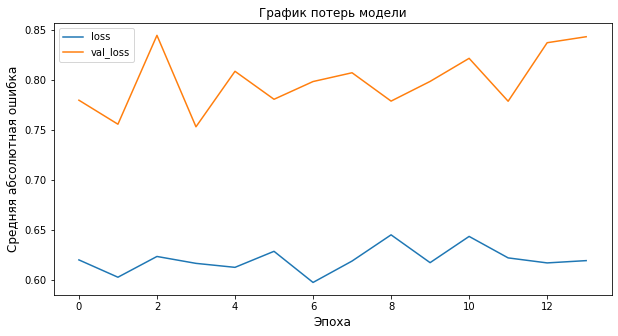

In [115]:
model_loss_plot(history_mn)

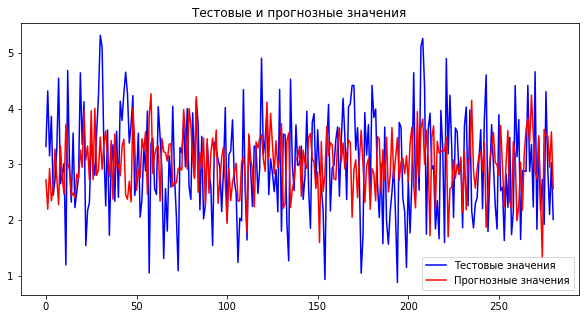

In [116]:
pred_mn = model_mn.predict(np.array((X_test_mn)))
original_mn = y_test_mn.values
predicted_mn = pred_mn

actual_and_predicted_plot(original_mn, predicted_mn)

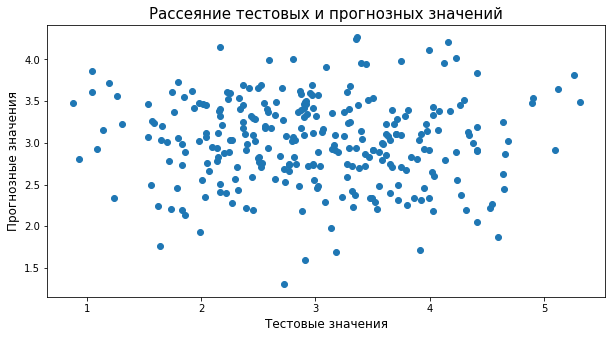

In [117]:
actual_and_predicted_scatter(original_mn, predicted_mn)

In [118]:
print(f'Model MAE: {model_mn.evaluate(X_test_mn, y_test_mn)}')

9/9 [==============================] - 0s 2ms/step - loss: 0.8691
Model MAE: 0.8690861463546753


In [119]:
print(f'MAE среднего значения: {np.mean(np.abs(y_test_mn-np.mean(y_test_mn)))}')

MAE среднего значения: Соотношение матрица-наполнитель    0.741688
dtype: float64
